___
# Convolutional Neural Network with Keras (Part 1) 

In this lab you will build a **CNN** for Loan Prediction (predict whether a loan will or will not be given).
___

## 1. Loading the Dataset & Inspecting


For this Lab, I have used a subset of the Loan Prediction dataset. You can download the training and testing dataset from here: [Download Data](https://drive.google.com/drive/folders/10beInU2j3J9tF_dpbt50_36oxoa9jJQx?usp=sharing)

Note : Testing data that you are provided is the subset of the training data from Loan Prediction problem.

 

Now, lets get started by importing important packages and the dataset.

In [3]:
# Load python modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection


PATH = "/home/michael/DataSciMSc/comp1804-AppliedML/week007/Lab_7/data"

In [7]:
# Load dataset from local drive (for colab notebook)
#from google.colab import files
import io

#uploaded = files.upload()    # Will prompt you to select the training file with the features and its values
#train_dataset = pd.read_csv(io.BytesIO(uploaded['X_train.csv']))
train_dataset = pd.read_csv("%s/X_train.csv"%PATH)

In [8]:
#uploaded = files.upload()    # Will prompt you to select the training file with the labels
#train_labels = pd.read_csv(io.BytesIO(uploaded['Y_train.csv']))


train_labels= pd.read_csv("%s/Y_train.csv"%PATH)


In [10]:
#uploaded = files.upload()    # Will prompt you to select the testing file with the features and its values
#test_dataset = pd.read_csv(io.BytesIO(uploaded['X_test.csv']))

test_dataset = pd.read_csv("%s/X_test.csv"%PATH)

In [11]:
#uploaded = files.upload()    # Will prompt you to select the testing file with the labels
#test_labels = pd.read_csv(io.BytesIO(uploaded['Y_test.csv']))

test_labels = pd.read_csv("%s/Y_test.csv"%PATH)

In [12]:
# shape
print(train_dataset.shape)
print(train_labels.shape)
train_dataset

(391, 12)
(391, 1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001031,Male,No,0,Graduate,No,NaN,0.0,125.0,360.0,1.0,Urban
1,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban
2,LP001824,Male,Yes,1,Graduate,No,2882.0,1843.0,123.0,480.0,1.0,Semiurban
3,LP002928,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban
4,LP001814,Male,Yes,2,Graduate,No,9703.0,0.0,112.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
386,LP001841,Male,No,0,Not Graduate,Yes,2583.0,2167.0,104.0,360.0,1.0,Rural
387,LP002820,Male,Yes,0,Graduate,No,5923.0,2054.0,211.0,360.0,1.0,Rural
388,LP001744,Male,No,0,Graduate,No,2971.0,2791.0,144.0,360.0,1.0,Semiurban
389,LP001552,Male,Yes,0,Graduate,No,4583.0,5625.0,255.0,360.0,1.0,Semiurban


In [13]:
print(test_dataset.shape)
print(test_labels.shape)

(96, 12)
(96, 1)


In [14]:
# list of column titles 
print(train_dataset.columns)
print(train_labels.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Index(['Target'], dtype='object')


In [15]:
# list of column (field) data types
print(train_dataset.dtypes)
print(train_labels.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
Target    object
dtype: object


In [16]:
# head
train_dataset.head(8)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001031,Male,No,0,Graduate,No,NaN,0.0,125.0,360.0,1.0,Urban
1,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban
2,LP001824,Male,Yes,1,Graduate,No,2882.0,1843.0,123.0,480.0,1.0,Semiurban
3,LP002928,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban
4,LP001814,Male,Yes,2,Graduate,No,9703.0,0.0,112.0,360.0,1.0,Urban
5,LP002244,Male,Yes,0,Graduate,No,2333.0,2417.0,136.0,360.0,1.0,Urban
6,LP001854,Male,Yes,3+,Graduate,No,5250.0,0.0,94.0,360.0,1.0,Urban
7,LP002505,Male,Yes,0,Graduate,No,4333.0,2451.0,110.0,360.0,1.0,Urban


<AxesSubplot:>

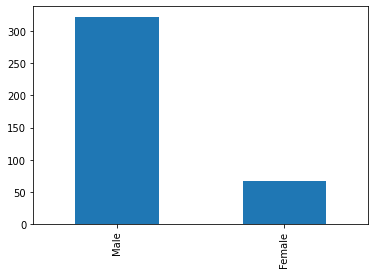

In [17]:
# create a bar plot: 
# A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. 
# A bar plot shows comparisons among discrete categories.
train_dataset['Gender'].value_counts().plot(kind='bar')



<AxesSubplot:>

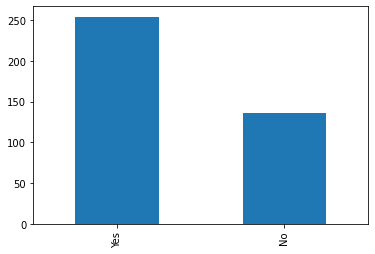

In [18]:
train_dataset['Married'].value_counts().plot(kind='bar')


<AxesSubplot:>

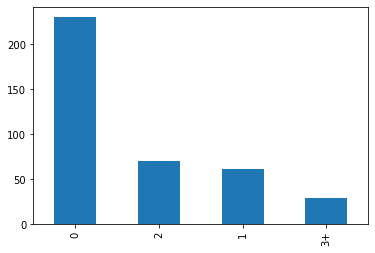

In [19]:
train_dataset['Dependents'].value_counts().plot(kind='bar')


<AxesSubplot:>

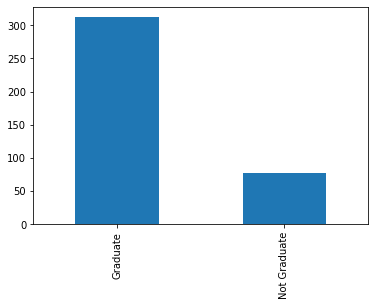

In [20]:
train_dataset['Education'].value_counts().plot(kind='bar')


<AxesSubplot:>

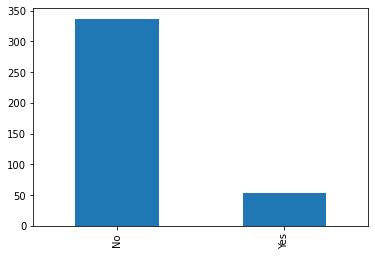

In [21]:
train_dataset['Self_Employed'].value_counts().plot(kind='bar')


<AxesSubplot:>

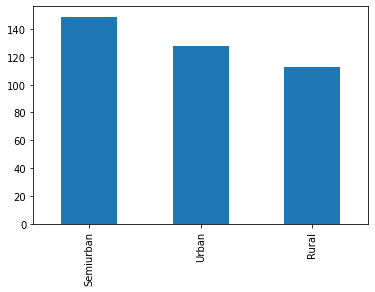

In [22]:
train_dataset['Property_Area'].value_counts().plot(kind='bar')


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

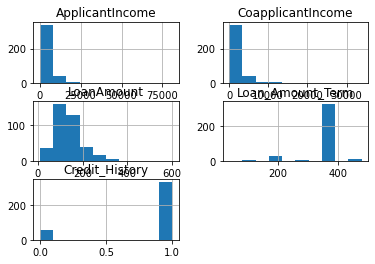

In [23]:
# Plot a histogram; it returns one histogram per numerical column
# It is a representation of the distribution of data
train_dataset.hist()


##2. Managing Missing Data

Sometimes you may find some data are missing in the dataset. If the missing values are not handled properly inaccurate inference about the data may result. Due to improper handling, the result obtained will differ from ones where the missing values are present. 

Since missing values can tangibly reduce prediction accuracy, this step needs to be a priority. In terms of machine learning, assumed or approximated values are “more appropriate” for an algorithm than just missing ones.  Even if you don’t know the exact value, methods exist to better “assume” which value is missing or bypass the issue. So how to сlean the data here? Choosing the right approach also heavily depends on data and the domain you have:
* Substitute missing values with dummy values, e.g. n/a for categorical or 0 for numerical values.
* Substitute the missing numerical values with mean figures.
* For categorical values, you can also use the most frequent items to fill in.

###2.1 Remove Unnecessary Features/Columns from both the training and testing dataset


In [24]:
train_dataset = train_dataset.drop("Loan_ID", axis=1)
train_dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,NaN,0.0,125.0,360.0,1.0,Urban
1,Male,No,0,Graduate,No,4950.0,0.0,125.0,360.0,1.0,Urban
2,Male,Yes,1,Graduate,No,2882.0,1843.0,123.0,480.0,1.0,Semiurban
3,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban
4,Male,Yes,2,Graduate,No,9703.0,0.0,112.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
386,Male,No,0,Not Graduate,Yes,2583.0,2167.0,104.0,360.0,1.0,Rural
387,Male,Yes,0,Graduate,No,5923.0,2054.0,211.0,360.0,1.0,Rural
388,Male,No,0,Graduate,No,2971.0,2791.0,144.0,360.0,1.0,Semiurban
389,Male,Yes,0,Graduate,No,4583.0,5625.0,255.0,360.0,1.0,Semiurban


In [25]:
test_dataset = test_dataset.drop("Loan_ID", axis=1)
test_dataset_no_nans = test_dataset.copy()
test_dataset_no_nans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Female,No,0,Not Graduate,No,3400,0,95,360,1,Rural
1,Male,Yes,0,Graduate,No,14583,0,436,360,1,Semiurban
2,Male,Yes,0,Graduate,No,2500,3796,120,360,1,Urban
3,Male,Yes,1,Graduate,No,3988,0,50,240,1,Urban
4,Male,Yes,2,Graduate,No,3859,0,96,360,1,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
91,Male,Yes,3+,Graduate,No,39999,0,600,180,0,Semiurban
92,Male,Yes,1,Graduate,No,3052,1030,100,360,1,Urban
93,Male,Yes,3+,Graduate,No,5167,3167,200,360,1,Semiurban
94,Male,Yes,2,Not Graduate,No,3987,1411,157,360,1,Rural


### 2.2 Filling in Missing Data



In [26]:
# check which features contain missing data/NaN values
print(train_dataset.isnull().sum())



Gender               1
Married              1
Dependents           1
Education            1
Self_Employed        0
ApplicantIncome      4
CoapplicantIncome    3
LoanAmount           1
Loan_Amount_Term     2
Credit_History       1
Property_Area        1
dtype: int64


In [27]:
# handling missing data for numeric features
from sklearn.impute import SimpleImputer 

train_dataset_no_nans =  train_dataset.copy()

# 1. Imputer
imptr = SimpleImputer(missing_values = np.nan, strategy = 'mean')  


# 2. Fit the imputer object to the feature matrix (only for numeric features)
imptr = imptr.fit(train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = \
imptr.transform(train_dataset_no_nans[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]) 

train_dataset_no_nans



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5134.046512,0.0,125.0,360.0,1.00000,Urban
1,Male,No,0,Graduate,No,4950.000000,0.0,125.0,360.0,1.00000,Urban
2,Male,Yes,1,Graduate,No,2882.000000,1843.0,123.0,480.0,1.00000,Semiurban
3,Male,Yes,0,Graduate,No,3000.000000,3416.0,56.0,180.0,1.00000,Semiurban
4,Male,Yes,2,Graduate,No,9703.000000,0.0,112.0,360.0,1.00000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
386,Male,No,0,Not Graduate,Yes,2583.000000,2167.0,104.0,360.0,1.00000,Rural
387,Male,Yes,0,Graduate,No,5923.000000,2054.0,211.0,360.0,1.00000,Rural
388,Male,No,0,Graduate,No,2971.000000,2791.0,144.0,360.0,1.00000,Semiurban
389,Male,Yes,0,Graduate,No,4583.000000,5625.0,255.0,360.0,1.00000,Semiurban


In [28]:
# handling missing data for categorical features

# 1. Imputer
imptr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  

# 2. Fit the imputer object to the feature matrix (both for numeric/categorical features)
imptr = imptr.fit(train_dataset_no_nans[['Gender', 'Married', 'Dependents', 'Education', 'Property_Area']])

# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
# 3. Call Transform to replace missing data in train_dataset (on specific columns) by the mean of the column to which that missing data belongs to
train_dataset_no_nans[['Gender', 'Married', 'Dependents', 'Education', 'Property_Area']] = \
imptr.transform(train_dataset_no_nans[['Gender', 'Married', 'Dependents', 'Education', 'Property_Area']]) 

train_dataset_no_nans





,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5134.046512,0.0,125.0,360.0,1.00000,Urban
1,Male,No,0,Graduate,No,4950.000000,0.0,125.0,360.0,1.00000,Urban
2,Male,Yes,1,Graduate,No,2882.000000,1843.0,123.0,480.0,1.00000,Semiurban
3,Male,Yes,0,Graduate,No,3000.000000,3416.0,56.0,180.0,1.00000,Semiurban
4,Male,Yes,2,Graduate,No,9703.000000,0.0,112.0,360.0,1.00000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
386,Male,No,0,Not Graduate,Yes,2583.000000,2167.0,104.0,360.0,1.00000,Rural
387,Male,Yes,0,Graduate,No,5923.000000,2054.0,211.0,360.0,1.00000,Rural
388,Male,No,0,Graduate,No,2971.000000,2791.0,144.0,360.0,1.00000,Semiurban
389,Male,Yes,0,Graduate,No,4583.000000,5625.0,255.0,360.0,1.00000,Semiurban


In [29]:
print(train_dataset_no_nans.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


One should follow the same procedure for filling in the missing data in the testing set, as well. However, in our case, the testing set does not contain any missing data.

##3.  Categorical Data

Data Preprocessing in machine learning requires values of the data in numerical form. Therefore text values in the columns of datasets must be converted into numerical form. 

###3.1 Converting categorical to numerical values

Given the original dataset, it is clear we have a few categorical features. All these need to be encoded. The [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class is used to transform the categorical or string values to numerical ones (between 0 and n_classes-1).



In [30]:
# we convert the features that you see below by using the label encoder as they have binary values
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_dataset_no_nans['Gender'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Gender']) 
train_dataset_no_nans['Married'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Married']) 
train_dataset_no_nans['Education'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Education']) 
train_dataset_no_nans['Self_Employed'] = lblEncoder_X.fit_transform(train_dataset_no_nans['Self_Employed']) 




In [31]:
# encode categorical data for the testing set too!
from sklearn.preprocessing import LabelEncoder
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
test_dataset_no_nans['Gender'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Gender']) 
test_dataset_no_nans['Married'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Married']) 
test_dataset_no_nans['Education'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Education']) 
test_dataset_no_nans['Self_Employed'] = lblEncoder_X.fit_transform(test_dataset_no_nans['Self_Employed']) 



print(test_dataset_no_nans)



    Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0        0        0          0          1              0             3400   
1        1        1          0          0              0            14583   
2        1        1          0          0              0             2500   
3        1        1          1          0              0             3988   
4        1        1          2          0              0             3859   
..     ...      ...        ...        ...            ...              ...   
91       1        1         3+          0              0            39999   
92       1        1          1          0              0             3052   
93       1        1         3+          0              0             5167   
94       1        1          2          1              0             3987   
95       1        0          0          0              0             8333   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0   

Now let us try a different encoding strategy, the one-hot encoding for the categorical features that are non-binary (contain at least 3 different values)

In [32]:
from sklearn.preprocessing import OneHotEncoder


oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Property_Area']])           # fit the OneHotEncoder object to feature Gender
print(aaa.categories_)

dum = aaa.transform(train_dataset_no_nans[['Property_Area']]).toarray()               

train_dataset_no_nans['Rural'] = dum[:,0]     
train_dataset_no_nans['Semiurban'] = dum[:,1]       
train_dataset_no_nans['Urban'] = dum[:,2]       

train_dataset_no_nans= train_dataset_no_nans.drop(columns='Property_Area',axis=1)  

######
aaa = oneHotEncoder.fit(train_dataset_no_nans[['Dependents']])           
print(aaa.categories_)

dum = aaa.transform(train_dataset_no_nans[['Dependents']]).toarray()               


train_dataset_no_nans['0'] = dum[:,0]     
train_dataset_no_nans['1'] = dum[:,1]       
train_dataset_no_nans['2'] = dum[:,2]       
train_dataset_no_nans['3+'] = dum[:,3]       


train_dataset_no_nans= train_dataset_no_nans.drop(columns='Dependents',axis=1)  
train_dataset_no_nans

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]
[array(['0', '1', '2', '3+'], dtype=object)]


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,0,1,2,3+
0,1,0,0,0,5134.046512,0.0,125.0,360.0,1.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,0,0,0,4950.000000,0.0,125.0,360.0,1.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,1,0,0,2882.000000,1843.0,123.0,480.0,1.00000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,1,0,0,3000.000000,3416.0,56.0,180.0,1.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,1,0,0,9703.000000,0.0,112.0,360.0,1.00000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1,0,1,1,2583.000000,2167.0,104.0,360.0,1.00000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
387,1,1,0,0,5923.000000,2054.0,211.0,360.0,1.00000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
388,1,0,0,0,2971.000000,2791.0,144.0,360.0,1.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
389,1,1,0,0,4583.000000,5625.0,255.0,360.0,1.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# one-hot encoding for the non-binary categorical data for the testing set too!

oneHotEncoder = OneHotEncoder()                                      # create OneHotEncoder object 
aaa = oneHotEncoder.fit(test_dataset_no_nans[['Property_Area']])           # fit the OneHotEncoder object to feature Gender
print(aaa.categories_)

dum = aaa.transform(test_dataset_no_nans[['Property_Area']]).toarray()               

test_dataset_no_nans['Rural'] = dum[:,0]     
test_dataset_no_nans['Semiurban'] = dum[:,1]       
test_dataset_no_nans['Urban'] = dum[:,2]      

test_dataset_no_nans= test_dataset_no_nans.drop(columns='Property_Area',axis=1)  

########

aaa = oneHotEncoder.fit(test_dataset_no_nans[['Dependents']])           # fit the OneHotEncoder object to feature Gender
print(aaa.categories_)

dum = aaa.transform(test_dataset_no_nans[['Dependents']]).toarray()               


test_dataset_no_nans['0'] = dum[:,0]     
test_dataset_no_nans['1'] = dum[:,1]      
test_dataset_no_nans['2'] = dum[:,2]       
test_dataset_no_nans['3+'] = dum[:,3]       


test_dataset_no_nans= test_dataset_no_nans.drop(columns='Dependents',axis=1)  

test_dataset_no_nans

##4.  Compute Statistics, Check Imbalance, Convert Categorical Labels to Numeric Ones

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>],
       [<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Rural'}>,
        <AxesSubplot:title={'center':'Semiurban'}>,
        <AxesSubplot:title={'center':'Urban'}>],
       [<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3+'}>]], dtype=object)

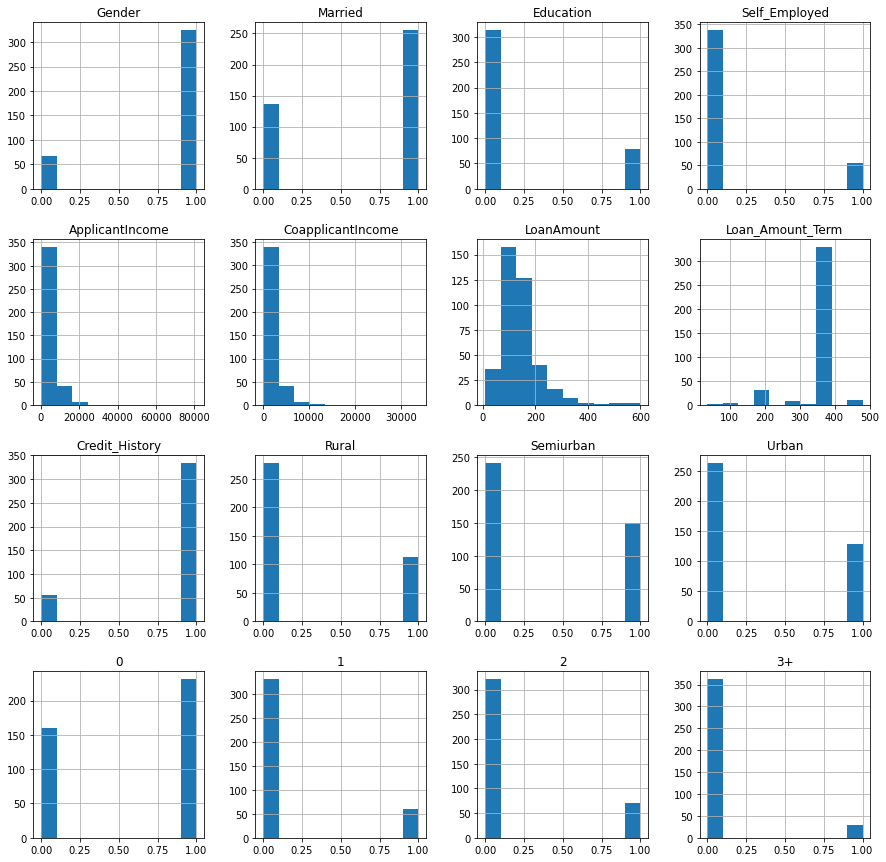

In [33]:
import matplotlib.pyplot as plt

# compute histograms of numeric features (you can see the ranges)
train_dataset_no_nans[train_dataset_no_nans.dtypes[(train_dataset_no_nans.dtypes=="float64") | (train_dataset_no_nans.dtypes=="int64")].index.values].hist(figsize=[15,15])  # the symbol '|' means 'or'



array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

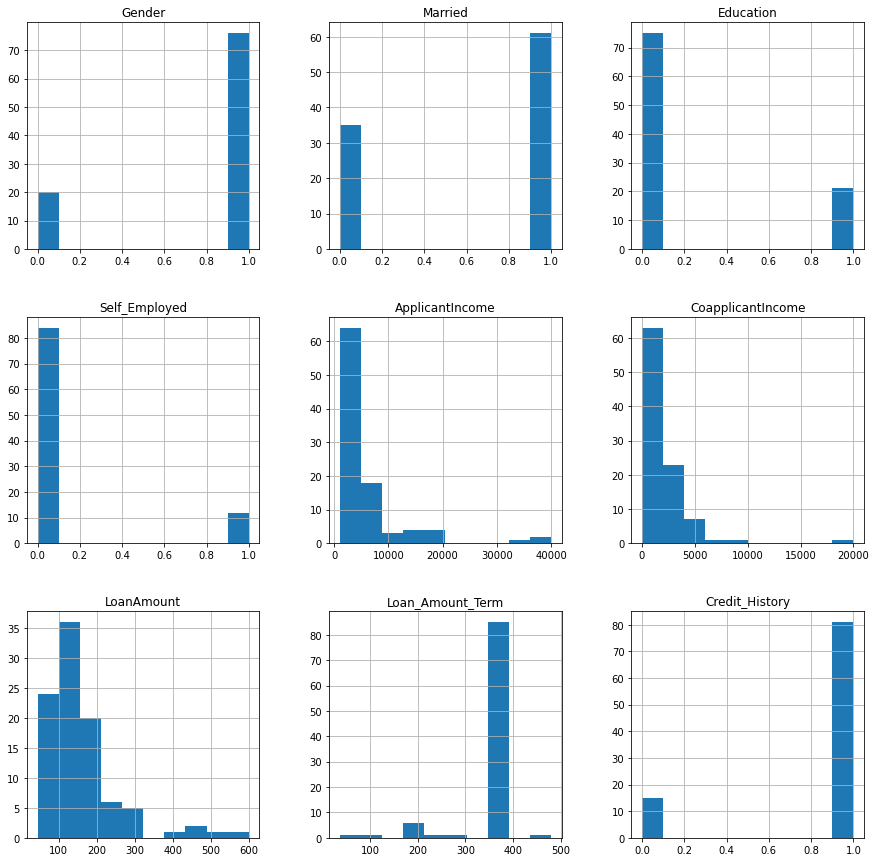

In [34]:
# same for the testing set
test_dataset_no_nans[test_dataset_no_nans.dtypes[(test_dataset_no_nans.dtypes=="float64") | (test_dataset_no_nans.dtypes=="int64")].index.values].hist(figsize=[15,15])  # the symbol '|' means 'or'


In [35]:
sampleClassBias = train_labels['Target'].value_counts()
print('Training Labels distribution:')
print(sampleClassBias)

sampleClassBias = test_labels['Target'].value_counts()
print('Test Labels distribution:')
print(sampleClassBias)

Training Labels distribution:
Y    276
N    115
Name: Target, dtype: int64
Test Labels distribution:
Y    61
N    35
Name: Target, dtype: int64


In [36]:
lblEncoder_X = LabelEncoder()                 # create an object of the LabelEncoder class
train_labels['Target'] = lblEncoder_X.fit_transform(train_labels['Target']) 
test_labels['Target'] = lblEncoder_X.fit_transform(test_labels['Target']) 
train_labels


,Target
0,1
1,1
2,1
3,1
4,1
...,...
386,1
387,1
388,1
389,1


##5.  Feature Scaling

When the data is comprised of feature values with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. 


###5.1 Implementing Feature Scaling

Feature scaling is a method used to scale the range of variables/values of features. 

>![feature scaling](https://drive.google.com/uc?id=1loaMbVo_7ZJo53Ogv7I0XMG_wSOOYBxI)

>  Figure 5: Feature Scaling methods
> Where X is the observation feature.

**It is not essential to understand the math behind these methods, what is important is to remember that the variables are being put in the same range / same scale so that no variable is dominated by another.**


In [37]:
#normalisation
train_dataset_no_nans_normalised = train_dataset_no_nans.copy()


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Normalising
train_dataset_no_nans_normalised[:]=min_max.fit_transform(train_dataset_no_nans_normalised[:])
train_dataset_no_nans_normalised


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,0,1,2,3+
0,1.0,0.0,0.0,0.0,0.061646,0.000000,0.196277,0.729730,1.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.059369,0.000000,0.196277,0.729730,1.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.033791,0.054467,0.192893,1.000000,1.00000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.035250,0.100955,0.079526,0.324324,1.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.118157,0.000000,0.174281,0.729730,1.00000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1.0,0.0,1.0,1.0,0.030093,0.064042,0.160745,0.729730,1.00000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
387,1.0,1.0,0.0,0.0,0.071404,0.060703,0.341794,0.729730,1.00000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
388,1.0,0.0,0.0,0.0,0.034892,0.082484,0.228426,0.729730,1.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
389,1.0,1.0,0.0,0.0,0.054830,0.166238,0.416244,0.729730,1.00000,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [38]:
#normalisation
test_dataset_no_nans_normalised = test_dataset_no_nans.copy()


# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Normalising
test_dataset_no_nans_normalised[:]=min_max.fit_transform(test_dataset_no_nans_normalised[:])
test_dataset_no_nans_normalised

ValueError: could not convert string to float: '3+'


Question: Do we need to apply feature scaling to the labels? The answer is no! The label is a categorical value that takes 2 values either no (0) or yes (1).  It is a classification problem.


In [39]:
# Standardisation
train_dataset_no_nans_standardised = train_dataset_no_nans.copy()

#Standardizing 
from sklearn.preprocessing import scale
train_dataset_no_nans_standardised[:]=scale(train_dataset_no_nans_standardised[:])
train_dataset_no_nans_standardised

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,0,1,2,3+
0,0.454742,-1.369306,-0.499201,-0.400297,0.000000,-0.605201,-0.220196,0.276053,0.409993,-0.637554,-0.788928,1.433418,0.832250,-0.429940,-0.466978,-0.283038
1,0.454742,-1.369306,-0.499201,-0.400297,-0.035029,-0.605201,-0.220196,0.276053,0.409993,-0.637554,-0.788928,1.433418,0.832250,-0.429940,-0.466978,-0.283038
2,0.454742,0.730297,-0.499201,-0.400297,-0.428626,0.101081,-0.246966,2.102325,0.409993,-0.637554,1.267544,-0.697633,-1.201561,2.325905,-0.466978,-0.283038
3,0.454742,0.730297,-0.499201,-0.400297,-0.406167,0.703893,-1.143745,-2.463354,0.409993,-0.637554,1.267544,-0.697633,0.832250,-0.429940,-0.466978,-0.283038
4,0.454742,0.730297,-0.499201,-0.400297,0.869596,-0.605201,-0.394198,0.276053,0.409993,-0.637554,-0.788928,1.433418,-1.201561,-0.429940,2.141428,-0.283038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.454742,-1.369306,2.003203,2.498147,-0.485533,0.225246,-0.501276,0.276053,0.409993,1.568495,-0.788928,-0.697633,0.832250,-0.429940,-0.466978,-0.283038
387,0.454742,0.730297,-0.499201,-0.400297,0.150159,0.181942,0.930893,0.276053,0.409993,1.568495,-0.788928,-0.697633,0.832250,-0.429940,-0.466978,-0.283038
388,0.454742,-1.369306,-0.499201,-0.400297,-0.411686,0.464378,0.034114,0.276053,0.409993,-0.637554,1.267544,-0.697633,0.832250,-0.429940,-0.466978,-0.283038
389,0.454742,0.730297,-0.499201,-0.400297,-0.104879,1.550435,1.519822,0.276053,0.409993,-0.637554,1.267544,-0.697633,0.832250,-0.429940,-0.466978,-0.283038


In [40]:
# Standardisation
test_dataset_no_nans_standardised = test_dataset_no_nans.copy()

#Standardizing 
test_dataset_no_nans_standardised[:]=scale(test_dataset_no_nans_standardised[:])
test_dataset_no_nans_standardised

ValueError: could not convert string to float: '3+'

##6. Use KNN classification method



In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Normalized data
# We will use a classifier (we will skip details and what it does for now, so just use it as it is)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_dataset_no_nans_normalised, train_labels['Target'])  
# Checking the model's accuracy (performance)
print(accuracy_score(test_labels['Target'],knn.predict(test_dataset_no_nans_normalised)))

# Standardized data
knn.fit(train_dataset_no_nans_standardised, train_labels['Target'])  
print(accuracy_score(test_labels['Target'],knn.predict(test_dataset_no_nans_standardised)))

ValueError: could not convert string to float: '3+'

## 7. Build CNN classifier and Test Performance


## Convolution Layer
`tf.keras.layers.Conv1D()` Convolution layer takes the following argument
> * **filters** Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
* **kernel_size** An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.
* **strides** An integer or tuple/list of a single integer, specifying the stride length of the convolution.
* **padding** one of "valid" or "same" (case-insensitive): 
  * **'VALID'**: it means no padding.
  * **'SAME'**: results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input. 
* **activation** activation function. Default value is: None
* **use_bias** Boolean, whether the layer uses a bias vector. Default value is: True
* **input_shape** Size of each input to the convolution.

In [42]:
train_dataset_no_nans_standardised = train_dataset_no_nans_standardised.values
test_dataset_no_nans_standardised = test_dataset_no_nans_standardised.values

In [43]:
train_dataset_no_nans_standardised = np.reshape(train_dataset_no_nans_standardised,[-1,16,1] )
test_dataset_no_nans_standardised = np.reshape(test_dataset_no_nans_standardised,[-1,16,1] )

In [44]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

model = models.Sequential()
model.add(layers.Conv1D(64, 4, padding = 'SAME', activation='relu', input_shape=(16,1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 4, padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 4, padding = 'SAME', activation='relu'))


model.add(layers.Flatten())


model.add(layers.Dense(1, activation='sigmoid'))


# as metric we choose the accuracy: the total number of correct predictions made
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()


# Training
history = model.fit(train_dataset_no_nans_standardised, train_labels, epochs=50, batch_size=130, 
                    validation_data=(test_dataset_no_nans_standardised, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16, 64)            320       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             16448     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 64)             16448     
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

## Try/Check the following (in random order)

1) Standardization vs Normalization </br>
2) Changing the number of feature maps in each conv layer </br>
3) Adding more layers to the network </br>
4) Using different activation functions </br>
5) Using different optimizers </br>
6) Using different learning rates </br>
7) Train for more epochs </br>


## More advanced:

1) Check other metrics. </br>
2) Find accuracy per category (meaning the accuracy when train_labels['Target'] = 1 and accuracy when train_labels['Target'] = 0) </br>
3) For the labels we used the LabelEncoder; what if we performed one-hot encoding. What modifications should we do in the code of the section 'Build CNN classifier and Test Performance'?  </br>
Note: no need to actually perform one-hot encoding to the labels and thus the code performing the LabelEncoder in Section 4 (Compute Statistics, Check Imbalance, Convert Categorical Labels to Numeric Ones) should not be changed. Modification should be made in the code of the section 'Build CNN classifier and Test Performance'. </br> 
What is the performance of the CNN in that case? </br>


